In [ ]:
#Library imports
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from joblib import dump
from tqdm import tqdm
!pip -q install pyngrok
!pip -q install streamlit
!pip -q install patool
from pyngrok import ngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suryakolluri","key":"dcf4f9d45975c7ae63f74cbc2b477a33"}'}

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d danialsharifrazi/hypertrophic-cardiomyopathy-dataset --force

100% 2.55G/2.55G [01:26<00:00, 34.8MB/s]
100% 2.55G/2.55G [01:26<00:00, 31.8MB/s]


In [ ]:
! unzip hypertrophic-cardiomyopathy-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Sick/Directory_24/series0055-Body/img0004--4.7633.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004--46.7633.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004--55.1633.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-12.0367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-20.4367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-28.8367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-3.6367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-37.2367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-45.6367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-54.0367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-62.4367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0004-70.8367.jpg  
  inflating: Sick/Directory_24/series0055-Body/img0005--13.1633.jpg  
  inflating: Sick/Directory_24/series0055-Body/img

In [ ]:
os.chdir("Normal")

In [ ]:
! ls

Directory_1   Directory_12  Directory_15  Directory_3  Directory_6  Directory_9
Directory_10  Directory_13  Directory_16  Directory_4  Directory_7
Directory_11  Directory_14  Directory_2   Directory_5  Directory_8


In [ ]:
os.chdir("Directory_1")

In [ ]:
! ls

 1-short	   series0031-Body   series0066-Body   series0100-Body
 2-long		   series0032-Body   series0067-Body   series0101-Body
 33		   series0033-Body   series0068-Body   series0102-Body
 series0001-Body   series0034-Body   series0069-Body   series0103-Body
 series0002-Body   series0035-Body   series0070-Body   series0104-Body
 series0003-Body   series0036-Body   series0071-Body   series0105-Body
 series0004-Body   series0037-Body   series0072-Body   series0106-Body
 series0005-Body   series0038-Body   series0073-Body   series0107-Body
 series0006-Body   series0039-Body   series0074-Body   series0108-Body
 series0007-Body   series0040-Body   series0075-Body   series0109-Body
 series0008-Body   series0041-Body   series0076-Body   series0110-Body
 series0009-Body   series0042-Body   series0077-Body   series0111-Body
 series0010-Body   series0043-Body   series0078-Body   series0112-Body
 series0011-Body   series0044-Body   series0079-Body   series0113-Body
 series0012-Body   series0045-B

In [ ]:
os.chdir("series0001-Body")

In [ ]:
! ls

img0001--9.jpg	img0002-15.jpg	img0003-39.jpg


(256, 256, 3)


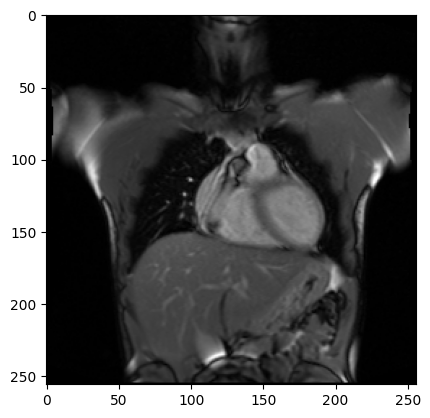

In [ ]:
# "Sick/Directory_20/series0001-Body/img0001--9.jpg"
dict_20series0001img1 = "img0001--9.jpg"
img = cv2.imread(dict_20series0001img1)
plt.imshow(img)
print(img.shape)

In [ ]:
os.chdir("/content/Sick/Directory_17/series0001-Body")

(256, 256, 3)


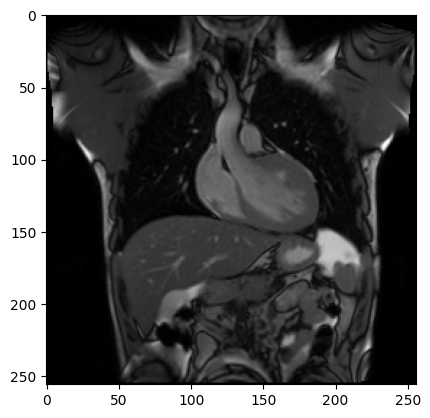

In [ ]:
dict_17series0001img1 = "img0001--9.jpg"
img = cv2.imread(dict_17series0001img1)
plt.imshow(img)
print(img.shape)

In [ ]:
os.chdir("/content/Normal/Directory_1/series0001-Body")

(256, 256, 3)


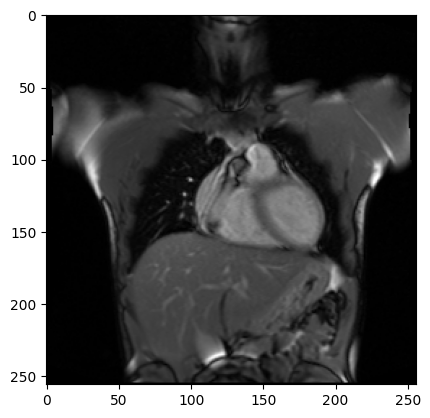

In [ ]:
dict1series0001img1 = "img0001--9.jpg"
img = cv2.imread(dict1series0001img1)
plt.imshow(img)
print(img.shape)

In [ ]:
! ls

img0001--9.jpg	img0002-15.jpg	img0003-39.jpg


In [ ]:
os.chdir("/content")

In [ ]:
os.chdir("/content/Sick/Directory_18/series0011-Body")

(180, 240, 3)


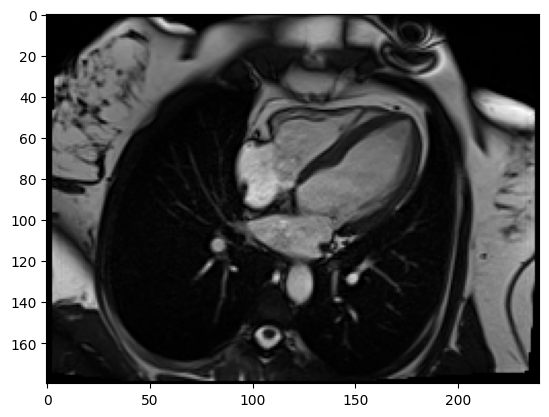

In [ ]:
dict_18series0011img5 = "img0005-36.9321.jpg"
img = cv2.imread(dict_18series0011img5)
plt.imshow(img)
print(img.shape)

(180, 240, 3)


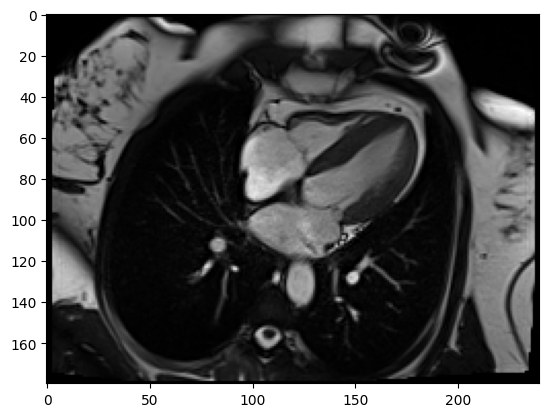

In [ ]:
img = cv2.imread("img0015-36.9321.jpg")
plt.imshow(img)
print(img.shape)

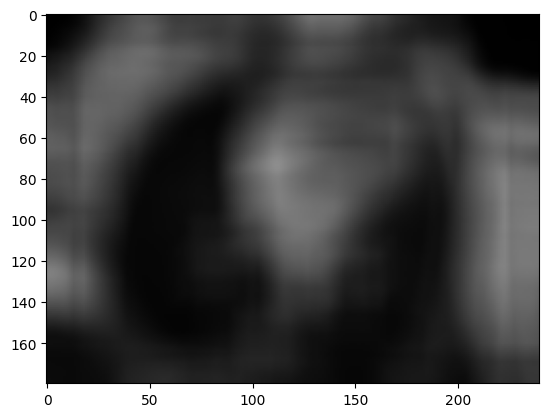

In [ ]:
img = cv2.blur(img, (30,30))
plt.imshow(img)

In [ ]:
! cd "/content/Normal/Directory_2/series0001-Body"

In [ ]:
! cd "/content/Normal"

In [ ]:
def count_files(dir_path):
  count = 0
  for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        count += 1

    else:
      for subpath in os.listdir(path):
        if os.subpath.isfile(os.path.join(path, subpath)):
          count += 1

  return count

In [ ]:
os.chdir("/content")

In [ ]:
! ls

hypertrophic-cardiomyopathy-dataset.zip  kaggle.json  Normal  sample_data  Sick


In [ ]:
def file_counter(path):
  count = 0
  for root, dirs, files in os.walk(path):
    for file in files:
      if(file.endswith(".jpg")):
        count += 1

  return count

In [ ]:
file_counter('/content/Normal')

37564

In [ ]:
file_counter('/content/Sick')

21855

In [ ]:
 def file_shape_printer(path):
  for root, dirs, files in os.walk(path):
      for file in files:
        if(file.endswith(".jpg")):
          img = cv2.imread(os.path.join(root,file))
          print(img.shape)

In [ ]:
def file_shape_checker(path, file_shape):
  count = 0
  for root, dirs, files in os.walk(path):
    for file in files:
      if(file.endswith(".jpg")):
        img = cv2.imread(os.path.join(root,file))
        if img.shape == file_shape:
          count += 1

  return count

In [ ]:
file_shape_printer("/content/Normal/Directory_2")

(416, 512, 3)
(416, 512, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(192, 192, 3)
(416, 512, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 214, 3)
(224, 

In [ ]:
imgshape = (192, 156, 3)

In [ ]:
file_shape_checker("/content/Normal", imgshape)

385

In [ ]:
file_shape_checker("/content/Sick", imgshape)

450

In [ ]:
def file_subsetter(path, file_shape, changed_file_shape):
  img_subset = []
  for root, dirs, files in os.walk(path):
    for file in files:
      if(file.endswith(".jpg")):
        img = cv2.imread(os.path.join(root,file))
        if img.shape == file_shape:
          img = cv2.resize(img, changed_file_shape)
          img_subset.append(img)

  return img_subset

In [ ]:
img_lst = file_subsetter("/content/Normal", imgshape, (192,132))

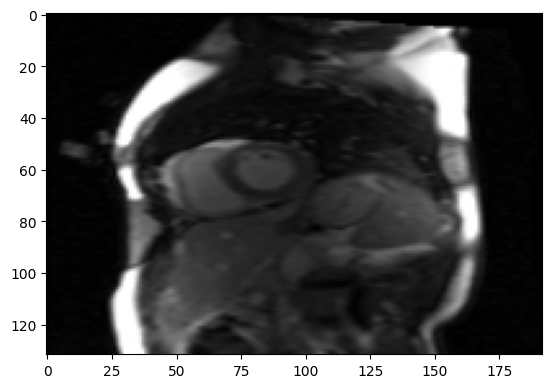

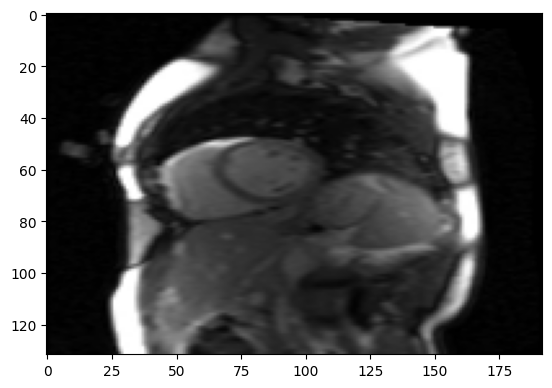

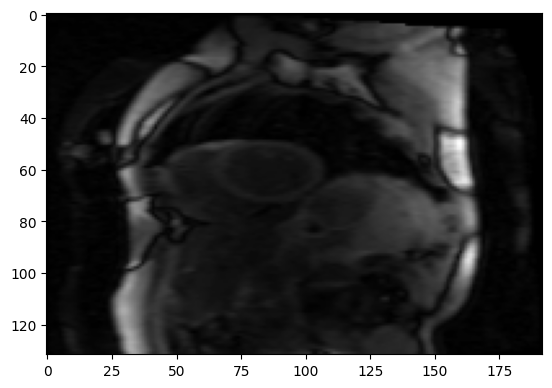

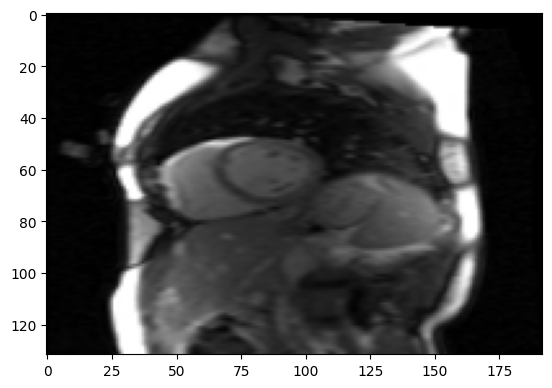

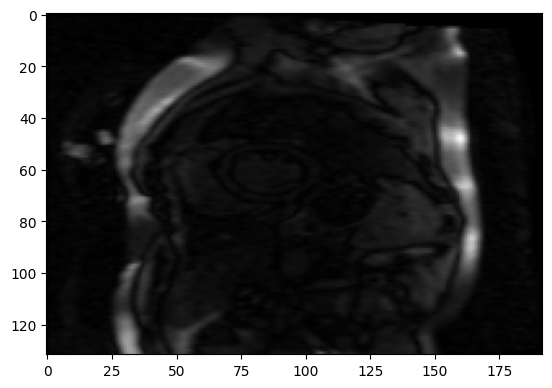

In [ ]:
for img in img_lst[:5]:
  plt.figure()
  plt.imshow(img)

In [ ]:
print(len(img_lst))

385


In [ ]:
img_lst2 = file_subsetter("/content/Sick", imgshape, (192,132))

In [ ]:
print(len(img_lst2))

450


In [ ]:
img_lst3 = file_subsetter("/content/Normal", (192, 132, 3), (192,132))
img_lst4 = file_subsetter("/content/Sick", (192, 132, 3), (192,132))
img_lst5 = file_subsetter("/content/Normal", (256, 218, 3), (192,132))
img_lst6 = file_subsetter("/content/Sick", (256, 218, 3), (192,132))
img_lst7 = file_subsetter("/content/Normal", (240, 240, 3), (192,132))
img_lst8 = file_subsetter("/content/Sick", (240, 240, 3), (192,132))

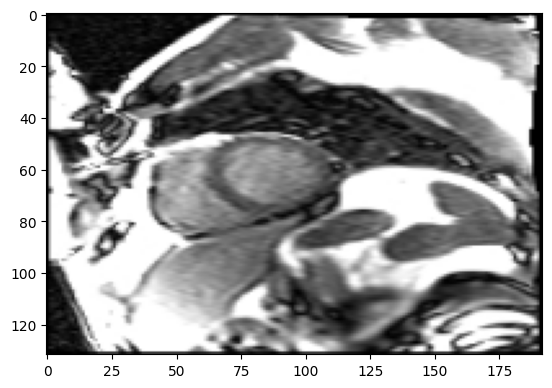

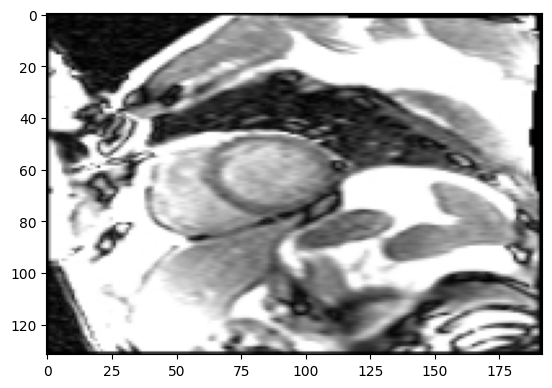

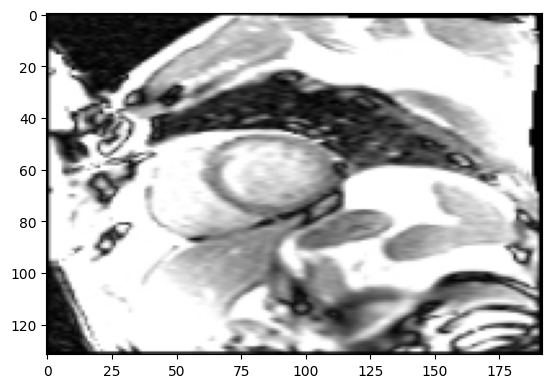

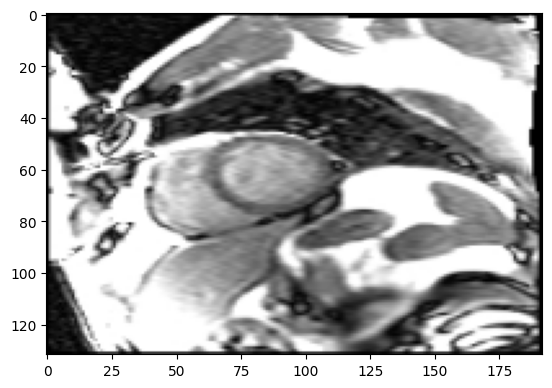

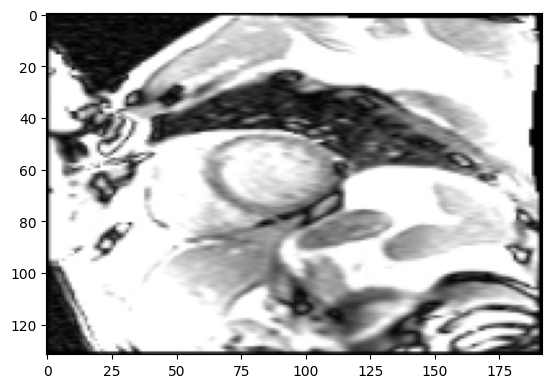

In [ ]:
for img in img_lst2[:5]:
  plt.figure()
  plt.imshow(img)

In [ ]:
img_lst_normal192156 = np.array(img_lst2)
print(img_lst_normal192156.shape)

(450, 132, 192, 3)


In [ ]:
img_lst_sick192156 = np.array(img_lst)
print(img_lst_sick192156.shape)

(385, 132, 192, 3)


In [ ]:
img_lst_normal192132 = np.array(img_lst4)
print(img_lst_normal192132.shape)

(750, 132, 192, 3)


In [ ]:
img_lst_sick192132 = np.array(img_lst3)
print(img_lst_sick192132.shape)

(720, 132, 192, 3)


In [ ]:
img_lst_normal256218 = np.array(img_lst6)
print(img_lst_normal256218.shape)

(887, 132, 192, 3)


In [ ]:
img_lst_sick256218 = np.array(img_lst5)
print(img_lst_sick256218.shape)

(968, 132, 192, 3)


In [ ]:
img_lst_normal240240 = np.array(img_lst8)
print(img_lst_normal240240.shape)

(883, 132, 192, 3)


In [ ]:
img_lst_sick240240 = np.array(img_lst7)
print(img_lst_sick240240.shape)

(808, 132, 192, 3)


In [ ]:
imglst = np.vstack((img_lst_sick192156, img_lst_normal192156, img_lst_sick192132, img_lst_normal192132, img_lst_sick256218, img_lst_normal256218, img_lst_sick240240, img_lst_normal240240))
print(imglst.shape)

(5851, 132, 192, 3)


In [ ]:
y = np.array(img_lst_sick192156.shape[0] * [0] + img_lst_normal192156.shape[0] * [1] + img_lst_sick192132.shape[0] * [0] + img_lst_normal192132.shape[0] * [1] + img_lst_sick256218.shape[0] * [0] + img_lst_normal256218.shape[0] * [1] + img_lst_sick240240.shape[0] * [0] + img_lst_normal240240.shape[0] * [1])
print(y)
print(sum(y))

[0 0 0 ... 1 1 1]
2970


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imglst, y, test_size = 0.2, random_state = 3)

In [ ]:
print(sum(y_train), y_train.shape)

2377 (4680,)


In [ ]:
print(X_train.shape, X_test.shape)

(4680, 132, 192, 3) (1171, 132, 192, 3)


In [ ]:
X_train = np.array(X_train)
print("X_train shape", X_train.shape)
print("X test shape",X_test.shape)
print("y train shape",y_train.shape)
print("y test shape",y_test.shape)

X_train shape (4680, 132, 192, 3)
X test shape (1171, 132, 192, 3)
y train shape (4680,)
y test shape (1171,)


In [ ]:
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]*X_train.shape[3]))

In [ ]:
print(X_train_reshaped.shape)

(4680, 76032)


In [ ]:
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]*X_test.shape[3]))

In [ ]:
print(X_test_reshaped.shape)

(1171, 76032)


In [ ]:
print(sum(y_test))

593


In [ ]:
randomforest_model = RandomForestClassifier(n_estimators= 100)
randomforest_model.fit(X_train_reshaped, y_train)
randomforest_pred = randomforest_model.predict(X_test_reshaped)
randomforest_accuracy = randomforest_model.score(X_test_reshaped, y_test)
print(randomforest_accuracy)

0.9470538001707942


In [ ]:
confusionmatrix_randomforest = confusion_matrix(y_test, randomforest_pred)
precision = confusionmatrix_randomforest[0][0] / (confusionmatrix_randomforest[0][0]+confusionmatrix_randomforest[0][1])
recall = confusionmatrix_randomforest[0][0] / (confusionmatrix_randomforest[0][0]+confusionmatrix_randomforest[1][0])
f1score = 2*precision*recall/ (precision + recall)
print(confusionmatrix_randomforest, "\nPrecision:", precision, "\nRecall:", recall, "\nF1 Score:", f1score)

[[571   7]
 [ 55 538]] 
Precision: 0.9878892733564014 
Recall: 0.9121405750798722 
F1 Score: 0.9485049833887044


In [ ]:
logreg_model = LogisticRegression(tol= 0.001, C = 0.1, random_state= 5, max_iter= 25)
logreg_model.fit(X_train_reshaped, y_train)
logreg_pred = logreg_model.predict(X_test_reshaped)
logreg_accuracy = logreg_model.score(X_test_reshaped, y_test)
print(logreg_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8812980358667806


In [ ]:
confusionmatrix_log = confusion_matrix(y_test, logreg_pred)
precision = confusionmatrix_log[0][0] / (confusionmatrix_log[0][0]+confusionmatrix_log[0][1])
recall = confusionmatrix_log[0][0] / (confusionmatrix_log[0][0]+confusionmatrix_log[1][0])
f1score = 2*precision*recall/ (precision + recall)
print(confusionmatrix_log, "\nPrecision:", precision, "\nRecall:", recall, "\nF1 Score:", f1score)

[[516  62]
 [ 77 516]] 
Precision: 0.8927335640138409 
Recall: 0.8701517706576728 
F1 Score: 0.8812980358667805


In [ ]:
print(sum(y_test))

593


In [ ]:
ridgeclass_model = RidgeClassifier(alpha=0.1, tol=0.0001, max_iter = 50)
ridgeclass_model.fit(X_train_reshaped, y_train)
ridge_pred = ridgeclass_model.predict(X_test_reshaped)
ridgeclass_accuracy = ridgeclass_model.score(X_test_reshaped, y_test)
print(ridgeclass_accuracy)

0.8855678906917165


In [ ]:
confusionmatrix_ridge = confusion_matrix(y_test, ridge_pred)
precision = confusionmatrix_ridge[0][0] / (confusionmatrix_ridge[0][0]+confusionmatrix_ridge[0][1])
recall = confusionmatrix_ridge[0][0] / (confusionmatrix_ridge[0][0]+confusionmatrix_ridge[1][0])
f1score = 2*precision*recall/ (precision + recall)
print(confusionmatrix_ridge, "\nPrecision:", precision, "\nRecall:", recall, "\nF1 Score:", f1score)

[[524  54]
 [ 80 513]] 
Precision: 0.9065743944636678 
Recall: 0.8675496688741722 
F1 Score: 0.8866328257191203


In [ ]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_reshaped, y_train)
decisiontree_pred = decisiontree.predict(X_test_reshaped)
decisiontree_accuracy = decisiontree.score(X_test_reshaped, y_test)
print(decisiontree_accuracy)

0.9009393680614859


In [ ]:
confusionmatrix_decisiontree = confusion_matrix(y_test, decisiontree_pred)
precision = confusionmatrix_decisiontree[0][0] / (confusionmatrix_decisiontree[0][0]+confusionmatrix_decisiontree[0][1])
recall = confusionmatrix_decisiontree[0][0] / (confusionmatrix_decisiontree[0][0]+confusionmatrix_decisiontree[1][0])
f1score = 2*precision*recall/ (precision + recall)
print(confusionmatrix_decisiontree, "\nPrecision:", precision, "\nRecall:", recall, "\nF1 Score:", f1score)

[[528  50]
 [ 66 527]] 
Precision: 0.9134948096885813 
Recall: 0.8888888888888888 
F1 Score: 0.9010238907849829


In [ ]:
svm_model = SVC()
svm_model.fit(X_train_reshaped, y_train)
svm_pred = svm_model.predict(X_test_reshaped)
svm_model_accuracy = svm_model.score(X_test_reshaped, y_test)

In [ ]:
print(svm_model_accuracy)

0.910333048676345


In [ ]:
confusionmatrix_svm = confusion_matrix(y_test, svm_pred)
precision = confusionmatrix_svm[0][0] / (confusionmatrix_svm[0][0]+confusionmatrix_svm[0][1])
recall = confusionmatrix_svm[0][0] / (confusionmatrix_svm[0][0]+confusionmatrix_svm[1][0])
f1score = 2*precision*recall/ (precision + recall)
print(confusionmatrix_svm, "\nPrecision:", precision, "\nRecall:", recall, "\nF1 Score:", f1score)

[[558  20]
 [ 85 508]] 
Precision: 0.9653979238754326 
Recall: 0.8678071539657853 
F1 Score: 0.9140049140049139


In [ ]:
dump(randomforest_model, "model.joblib")

In [ ]:
!ngrok authtoken 2Ap25X6Vhmysbp1TM0yCkHRxZsP_4HoDgxjb6fuREqoFaLbDX

In [ ]:
public_url = ngrok.connect(port='80')

In [ ]:
import streamlit as st
from joblib import load
import numpy as np
import cv2

model = load("model.joblib" )

st.title("Hypertrophic Cardiomyopathy Diagnosis App")
st.subheader("CMR Images")

uploaded_file = st.file_uploader("Upload Image")

if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image = cv2.imdecode(file_bytes, 1)
    st.image(image, caption="Input Image", channels="BGR")

    small = cv2.resize(image, (192,132))
    gray = cv2.cvtColor(small, cv2.COLOR_BGR2GRAY)

    gray_flat = np.reshape(gray,(1,25344))
    prediction = model.predict(gray_flat)[0]

    if prediction == 1:
      st.write('HCM Detected')
    else:
      st.write('No HCM Detected')

In [ ]:
from keras.layers import Flatten, Dense, Dropout

In [ ]:
from keras.regularizers import l1

In [ ]:
cnn = Sequential()
for i in range(2):
  cnn.add(Conv2D(filters = 64, input_shape = (132,192,3), kernel_size = (3,3), activation = 'relu'))
  cnn.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
  cnn.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu'))
  cnn.add(MaxPooling2D(2, 2))

cnn.add(Flatten())
cnn.add(Dense(units = 64, activation = 'relu', kernel_regularizer = l1(0.0001)))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 16, activation = 'relu', kernel_regularizer = l1(0.0001)))
cnn.add(Dropout(0.2))
cnn.add(Dense(units = 4, activation = 'relu', kernel_regularizer = l1(0.0001)))
cnn.add(Dropout(0.1))
cnn.add(Dense(units = 1, activation = 'sigmoid', kernel_regularizer = l1(0.0001)))

In [ ]:
cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=40, batch_size=200, validation_data = (X_test, y_test), shuffle = True)

Epoch 1/40
24/24 [==============================] - 44s 827ms/step - loss: 1.6469 - accuracy: 0.5058 - val_loss: 1.4142 - val_accuracy: 0.5064
Epoch 2/40
24/24 [==============================] - 10s 413ms/step - loss: 1.3279 - accuracy: 0.5128 - val_loss: 1.2606 - val_accuracy: 0.5175
Epoch 3/40
24/24 [==============================] - 10s 420ms/step - loss: 1.1304 - accuracy: 0.6415 - val_loss: 0.9271 - val_accuracy: 0.7976
Epoch 4/40
24/24 [==============================] - 10s 425ms/step - loss: 0.9277 - accuracy: 0.7823 - val_loss: 0.8125 - val_accuracy: 0.8275
Epoch 5/40
24/24 [==============================] - 10s 432ms/step - loss: 0.8566 - accuracy: 0.8150 - val_loss: 0.7784 - val_accuracy: 0.8608
Epoch 6/40
24/24 [==============================] - 11s 440ms/step - loss: 0.7744 - accuracy: 0.8701 - val_loss: 0.7379 - val_accuracy: 0.8685
Epoch 7/40
24/24 [==============================] - 11s 445ms/step - loss: 0.7194 - accuracy: 0.8919 - val_loss: 0.7070 - val_accuracy: 0.8813

In [ ]:
cnn_pred = cnn.predict(X_test)

37/37 [==============================] - 3s 35ms/step


In [ ]:
cnn_pred_binary = np.round(cnn_pred).astype(int)

In [ ]:
accuracy = accuracy_score(y_test, cnn_pred_binary)
precision = precision_score(y_test, cnn_pred_binary)
recall = recall_score(y_test, cnn_pred_binary)
f1score = 2*precision*recall/ (precision + recall)
print('Accuracy:', accuracy, '\nPrecision', precision, '\nRecall', recall, "F1 Score:", f1score)

Accuracy: 0.9547395388556789 
Precision 0.96875 
Recall 0.9409780775716695 F1 Score: 0.9546621043627032


In [ ]:
print(confusion_matrix)

<function confusion_matrix at 0x79c2147af250>


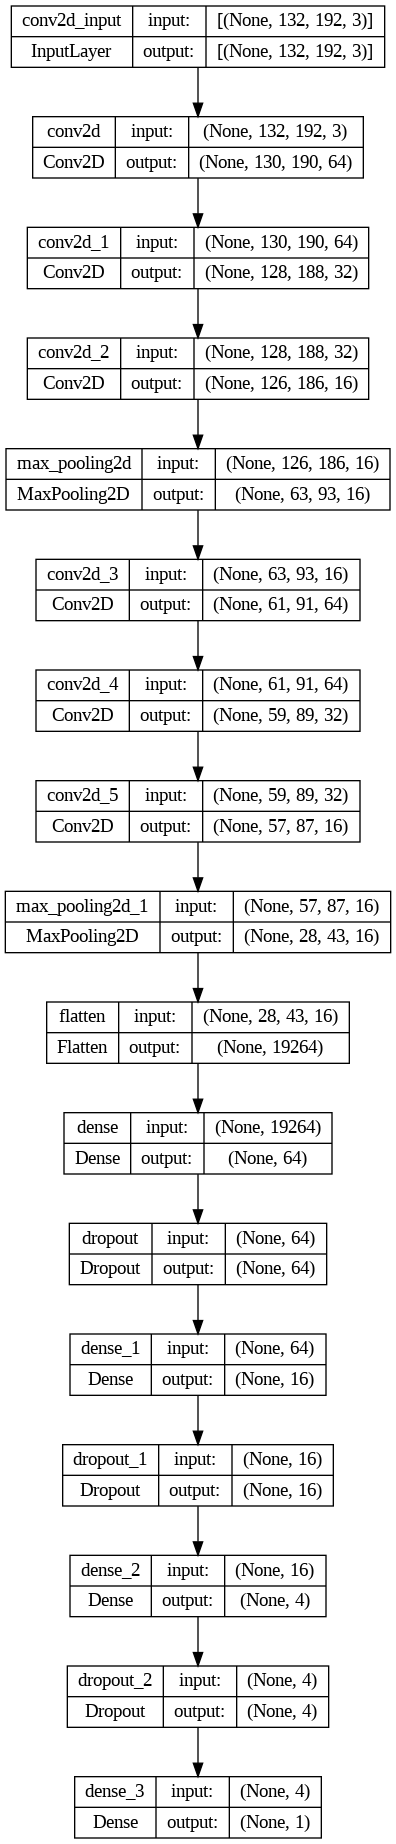

In [ ]:
keras.utils.plot_model(cnn, to_file='cnn_model.png', show_shapes=True)

In [ ]:
cnn.save('model_saved')

In [ ]:
dump(cnn, '/content/drive/My Drive/cmr_cnn.joblib')

['/content/drive/My Drive/cmr_cnn.joblib']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
n

'/content/drive/My Drive/model_saved'